# This will be the final analysis of our work
The fruits of our labor

In [1]:
from refugee_analysis import *

%matplotlib inline

/Users/kenn/anaconda/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


### Ken M Data Import

In [2]:
ken_m_data = getpickle('ken_m_data.pkl')
ken_m_data = ken_m_data[ken_m_data.columns[:-1]]

In [3]:
ken_m_data.head()

civil_liberties  political_rights  female_legislators  \
year countrycode                                                          
2008 AFG                        6                 5                27.7   
     AGO                        5                 6                37.3   
     ALB                        3                 3                 7.1   
     ARE                        5                 6                22.5   
     ARG                        2                 2                40.0   

                  population_growth  population_female  life_expectancy  \
year countrycode                                                          
2008 AFG                   2.485315          48.512909        58.225024   
     AGO                   3.374180          50.493712        49.847390   
     ALB                  -0.767343          49.610212        76.632317   
     ARE                  13.810060          25.880062        76.307756   
     ARG                   1.025393          51.087196        75.166268   

                  population_15_64  
year countrycode                    
2008 AFG                 49.946087  
     AGO                 49.356104  
     ALB                 66.816430  
     ARE                 84.600650  
     ARG                 63.456290

### Ken C Data Import

In [4]:
ken_c_data = pd.read_csv('securitydataset(complete).csv')

a    Number of Armed Conflict during Calendar Year    discrete

b    Nature of Conflict: Government/Governance    categorical (0-1 range)

c    Nature of Conflict: Territory    categorical (0-1 range)

d    Number Killed during Calendar Year    categorical (0-2 range)

e    Cummulative Intensity (Total deaths > 1000)    categorical (0-1 range)

f    EAC    categorical (0-1 range)

g    IIAC    categorical (0-1 range)

h    InternalAC    categorical (0-1 range)

i    InterstateAC    categorical (0-1 range)

In [5]:
ken_c_data = ken_c_data.set_index(['year', 'countrycode']).sort_index()

In [6]:
ken_c_cat_names = ['a','b','c','d','e','f','g','h','i']
ken_c_preferred_names = ['NumArmedConflicts',\
                         'NatureOfConflictGov',\
                         'NatureOfConflictTerr',\
                         'NumKilled',\
                         'CummIntensity',\
                         'EAC',\
                         'IIAC',\
                         'InternalAC',\
                         'InterstateAC']
columns_wanted = ['peace_index', 'terror_index'] + ken_c_preferred_names

In [7]:
for i, column in enumerate(ken_c_cat_names):
    ken_c_data[ken_c_preferred_names[i]] = ken_c_data[column]
    
ken_c_data = ken_c_data[columns_wanted]

In [8]:
ken_c_data.head()

peace_index  terror_index  NumArmedConflicts  \
year countrycode                                                 
2008 AFG                2.983         8.011                  1   
     AGO                2.132         0.000                  0   
     ALB                1.911         0.000                  0   
     ARE                1.584         0.000                  0   
     ARG                1.791         0.363                  0   

                  NatureOfConflictGov  NatureOfConflictTerr  NumKilled  \
year countrycode                                                         
2008 AFG                            1                     0          2   
     AGO                            0                     0          0   
     ALB                            0                     0          0   
     ARE                            0                     0          0   
     ARG                            0                     0          0   

                  CummIntensity  EAC  IIAC  InternalAC  InterstateAC  
year countrycode                                                      
2008 AFG                      1    0     1           0             0  
     AGO                      0    0     0           0             0  
     ALB                      0    0     0           0             0  
     ARE                      0    0     0           0             0  
     ARG                      0    0     0           0             0

### Dan Data Import

In [9]:
dan_data = getpickle('dan_data.pkl')

In [10]:
dan_data.head()

adolescent_fertility  have_good_sanitation  \
year countrycode                                               
2008 AFG                    111.470800             28.000000   
     AGO                    185.912000             43.300000   
     ALB                     19.039600             89.600000   
     ARB                     49.901458             77.435752   
     ARE                     29.422600             97.500000   

                  labor_force_participation  population_total  unemployment  \
year countrycode                                                              
2008 AFG                          48.000000          26528741      8.900000   
     AGO                          69.099998          19842251      6.800000   
     ALB                          55.900002           2947314     13.000000   
     ARB                          49.229262         336662433     10.504797   
     ARE                          77.099998           6900142      4.000000   

                  inflation  population_65_up  
year countrycode                               
2008 AFG          30.554941          2.228685  
     AGO          12.473713          2.377921  
     ALB           3.359242          9.960492  
     ARB          11.270665          4.147783  
     ARE          12.250420          0.717594

### Bryan Data Import

In [11]:
bryan_data = getpickle('bryan_data.pkl').sort_index()

In [12]:
bryan_data = bryan_data.reset_index()
bryan_data = bryan_data.set_index(['year', 'countrycode']).sort_index()
bryan_data = bryan_data[['gdp_ppp', 'food_production_dom', 'youth_unemployment', 'zscores']]
bryan_data['zscores'] = bryan_data['zscores'].astype(float)
bryan_data.loc[bryan_data['zscores'] > 0, 'zscores'] = 1
bryan_data.loc[bryan_data['zscores'] <= 0, 'zscores'] = 0

In [13]:
bryan_data.head()

gdp_ppp  food_production_dom  youth_unemployment  \
year countrycode                                                          
2008 AFG           1283.040986           100.440000           37.500000   
     AGO                   NaN           129.740000           52.299999   
     ALB           8769.117112           107.740000           35.700001   
     ARB          13680.586368           105.228109           33.253546   
     ARE          69124.396211           102.440000           52.500000   

                  zscores  
year countrycode           
2008 AFG                1  
     AGO                1  
     ALB                1  
     ARB                1  
     ARE                0

### Emily Data Import

In [14]:
emily_data = pd.read_csv('emily_climate_data.csv')

In [15]:
emily_data = emily_data[emily_data.year >= 2008]
emily_data = emily_data.set_index(['year', 'countrycode']).sort_index()

In [16]:
emily_data = emily_data[['forestarea', 'arable_land']]
emily_data = emily_data

In [17]:
emily_data.head()

forestarea  arable_land
year countrycode                         
2008 AFG           -1.266677    -0.282813
     AGO            0.720465    -0.940498
     ALB           -0.103987     0.454378
     ARG           -0.886647    -0.215245
     ARM           -0.844345    -0.005636

In [18]:
print(len(ken_m_data))
print(len(ken_c_data))
print(len(bryan_data))
print(len(dan_data))
print(len(emily_data))

1086
1127
1242
1128
937


In [19]:
full_data = pd.DataFrame()
full_data = pd.concat([ken_c_data, dan_data, emily_data, ken_m_data, bryan_data], axis=1)
full_data.head()

peace_index  terror_index  NumArmedConflicts  \
year countrycode                                                 
2008 AFG                2.983         8.011                  1   
     AGO                2.132         0.000                  0   
     ALB                1.911         0.000                  0   
     ARB                  NaN           NaN                NaN   
     ARE                1.584         0.000                  0   

                  NatureOfConflictGov  NatureOfConflictTerr  NumKilled  \
year countrycode                                                         
2008 AFG                            1                     0          2   
     AGO                            0                     0          0   
     ALB                            0                     0          0   
     ARB                          NaN                   NaN        NaN   
     ARE                            0                     0          0   

                  CummIntensity  EAC  IIAC  InternalAC   ...     \
year countrycode                                         ...      
2008 AFG                      1    0     1           0   ...      
     AGO                      0    0     0           0   ...      
     ALB                      0    0     0           0   ...      
     ARB                    NaN  NaN   NaN         NaN   ...      
     ARE                      0    0     0           0   ...      

                  political_rights  female_legislators  population_growth  \
year countrycode                                                            
2008 AFG                         5                27.7           2.485315   
     AGO                         6                37.3           3.374180   
     ALB                         3                 7.1          -0.767343   
     ARB                       NaN                 NaN                NaN   
     ARE                         6                22.5          13.810060   

                  population_female  life_expectancy  population_15_64  \
year countrycode                                                         
2008 AFG                  48.512909        58.225024         49.946087   
     AGO                  50.493712        49.847390         49.356104   
     ALB                  49.610212        76.632317         66.816430   
     ARB                        NaN              NaN               NaN   
     ARE                  25.880062        76.307756         84.600650   

                       gdp_ppp  food_production_dom  youth_unemployment  \
year countrycode                                                          
2008 AFG           1283.040986           100.440000           37.500000   
     AGO                   NaN           129.740000           52.299999   
     ALB           8769.117112           107.740000           35.700001   
     ARB          13680.586368           105.228109           33.253546   
     ARE          69124.396211           102.440000           52.500000   

                  zscores  
year countrycode           
2008 AFG                1  
     AGO                1  
     ALB                1  
     ARB                1  
     ARE                0  

[5 rows x 31 columns]

In [20]:
full_data.columns

Index(['peace_index', 'terror_index', 'NumArmedConflicts',
       'NatureOfConflictGov', 'NatureOfConflictTerr', 'NumKilled',
       'CummIntensity', 'EAC', 'IIAC', 'InternalAC', 'InterstateAC',
       'adolescent_fertility', 'have_good_sanitation',
       'labor_force_participation', 'population_total', 'unemployment',
       'inflation', 'population_65_up', 'forestarea', 'arable_land',
       'civil_liberties', 'political_rights', 'female_legislators',
       'population_growth', 'population_female', 'life_expectancy',
       'population_15_64', 'gdp_ppp', 'food_production_dom',
       'youth_unemployment', 'zscores'],
      dtype='object')

In [21]:
#The rows to be dropped
len(full_data[full_data.isnull().any(axis=1)])

736

That's too many rows!!!

In [22]:
print(len(full_data))
print(len(full_data.loc[full_data.peace_index.notnull(), 'peace_index']))
print(len(full_data.loc[full_data.peace_index.isnull(), 'peace_index']))

1493
1127
366


Fill rows with average

In [23]:
x_columns = full_data.columns[:-1]

for column in x_columns:
    full_data.loc[full_data[column].isnull(), column] = np.mean(full_data.loc[full_data[column].notnull(), column])

In [24]:
#drop rows where the zscore is null, 
#don't want to make an average prediction 
#for countries where it might actually have conflict
full_data = full_data.dropna()

## Analysis

In [25]:
x_cols = full_data.columns[:-1]
X = full_data[x_cols]
y = full_data['zscores']

/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ROCAUC
KNeighborsClassifier(n_neighbors=1),0.815633,0.448703,0.436129,0.440230,0.663954
"SVC(gamma=1, C=10, kernel='rbf')",0.832884,0.000000,0.000000,0.000000,0.500000
SVC(),0.833962,0.400000,0.006452,0.012698,0.503226
LogisticRegression(),0.832399,0.000000,0.000000,0.000000,0.499709
BernoulliNB(),0.637520,0.247919,0.572258,0.345699,0.611436
GaussianNB(),0.274447,0.179800,0.937419,0.301695,0.539422
RandomForestClassifier(n_estimators=30),0.969218,0.916444,0.899677,0.907067,0.941424
DecisionTreeClassifier(),0.944906,0.839160,0.830968,0.833744,0.899367


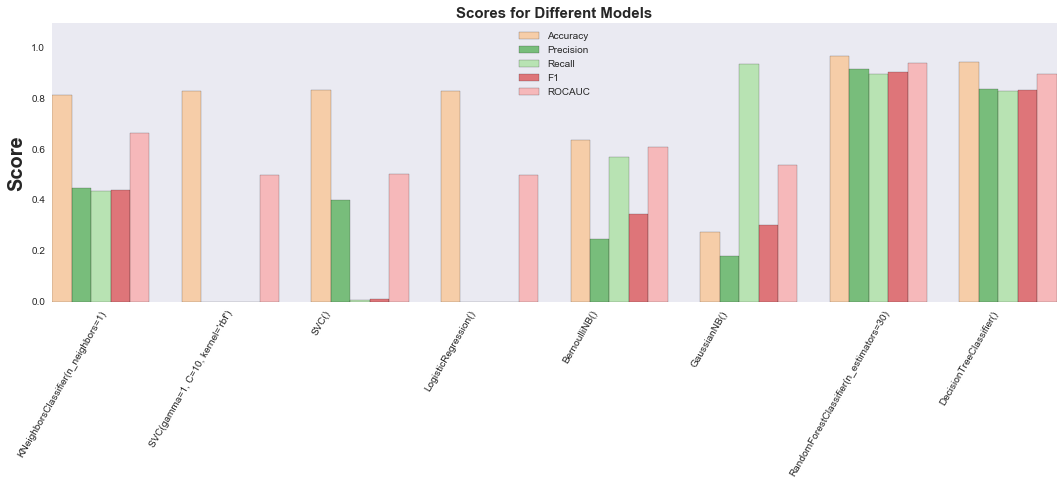

In [26]:
modeling = getCrossValScoresBySSS(X,y)
modeling.get_multi_models(make_single_plot=True)

/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ROCAUC
KNeighborsClassifier(n_neighbors=1),0.800580,0.386359,0.421818,0.402579,0.647116
"SVC(gamma=1, C=10, kernel='rbf')",0.840580,0.000000,0.000000,0.000000,0.500000
SVC(),0.843961,0.700000,0.021212,0.041176,0.510606
LogisticRegression(),0.840580,0.000000,0.000000,0.000000,0.500000
BernoulliNB(),0.652947,0.247003,0.574545,0.345477,0.621181
GaussianNB(),0.283382,0.166421,0.870909,0.279415,0.521432
RandomForestClassifier(n_estimators=30),0.952560,0.855936,0.844848,0.849798,0.908918
DecisionTreeClassifier(),0.924831,0.770089,0.757576,0.762096,0.857064


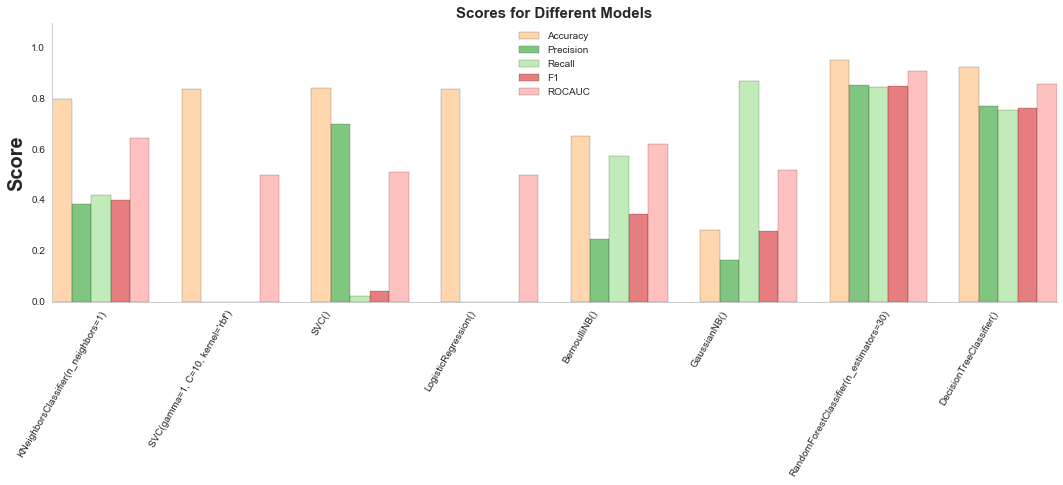

In [27]:
modeling.get_multi_models(year=2013, make_single_plot=True)

for n in range(1,8):
    print('n = ', n)
    modeling.get_single_model(model=KNeighborsClassifier(n_neighbors=n), get_cm=True)
    print('\n')

forest_acc = []
forest_prec = []
forest_rec = []
forest_f1 = []
forest_range = list(range(1,30))
for trees in forest_range:
    acc, prec, rec, f1, _ = modeling.get_single_model(model=RandomForestClassifier(n_estimators=trees), verbose=False)
    forest_acc.append(acc)
    forest_prec.append(prec)
    forest_rec.append(rec)
    forest_f1.append(f1)

plt.figure(figsize=(11,7))
plt.plot(forest_range, forest_acc, label='Accuracy')
plt.plot(forest_range, forest_prec,label='Precision')
plt.plot(forest_range, forest_rec,label='Recall')
plt.plot(forest_range, forest_f1,label='F1')

plt.legend(loc='best')
plt.xlabel('Num Trees')
plt.ylabel('Score')
plt.title('Scores at various tree sizes')
plt.show()

[[308   1]
 [  7  55]]
Avg Feature Importance: [ 0.03167909  0.02415935  0.0101313   0.01421526  0.00341886  0.00839709
  0.00396175  0.          0.00465026  0.00384743  0.00246902  0.05445047
  0.07756834  0.05361235  0.0484289   0.04238886  0.01630792  0.07534449
  0.02932768  0.03884262  0.05085172  0.04019326  0.03013389  0.03817187
  0.03297203  0.04607967  0.04523123  0.10378086  0.02220901  0.04717542]
Accuracy: 0.9719137466307278
Precision: 0.9224214136811887
Recall: 0.91
f1: 0.9154609062224546
ROC AUC: 0.947168284789644


(0.97191374663072783,
 0.92242141368118868,
 0.91000000000000003,
 0.91546090622245457,
 0.94716828478964399)

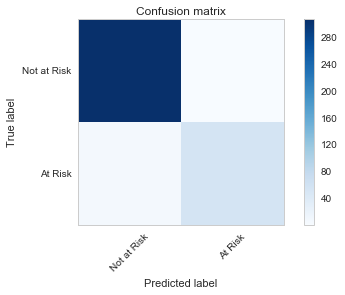

In [28]:
modeling.get_single_model(model=RandomForestClassifier(n_estimators=100), get_cm = True, return_features=False)

[[301   8]
 [  7  55]]
Avg Feature Importance: [ 0.03310949  0.02457877  0.00958195  0.01402683  0.00314222  0.00846011
  0.00431226  0.          0.00469538  0.00461602  0.00257649  0.05499586
  0.0776406   0.05118575  0.05036279  0.04345505  0.01520522  0.07532998
  0.02926137  0.03718742  0.05129849  0.03868667  0.03041202  0.0393484
  0.03423788  0.04650966  0.04287312  0.10142184  0.02193477  0.04955357]
Accuracy: 0.9687870619946092
Precision: 0.9196427862383136
Recall: 0.892258064516129
f1: 0.9048158593246319
ROC AUC: 0.9382002296690678


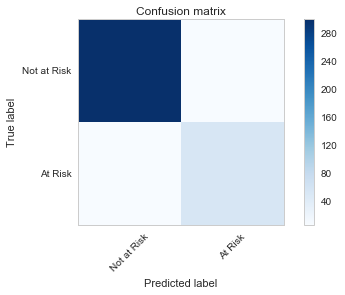

In [29]:
rf = modeling.get_single_model(model=RandomForestClassifier(n_estimators=30), get_cm = True, return_features=True)

[[297  12]
 [  9  53]]
Avg Feature Importance: [ 0.01825368  0.01191661  0.00064237  0.02351627  0.00117517  0.00057112
  0.0003198   0.          0.          0.00060725  0.00040069  0.06645882
  0.02410085  0.03402246  0.04404853  0.02440271  0.01148281  0.0766258
  0.03284664  0.04778392  0.10036466  0.01497443  0.01549403  0.03323073
  0.0401015   0.02696322  0.06440691  0.22366518  0.01865012  0.04297372]
Accuracy: 0.944366576819407
Precision: 0.834940472711278
Recall: 0.8361290322580645
f1: 0.8337564611242999
ROC AUC: 0.9011065873264432


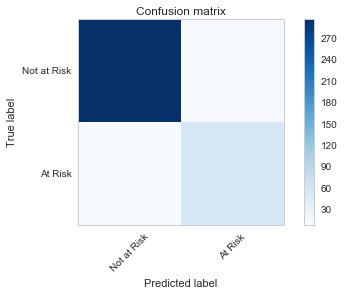

In [30]:
dtc = modeling.get_single_model(model=DecisionTreeClassifier(), get_cm = True, return_features=True)

In [31]:
features = [[x,y] for x,y in rf]
features

[['peace_index', 0.033109488375843925],
 ['terror_index', 0.024578772718999723],
 ['NumArmedConflicts', 0.0095819539729015187],
 ['NatureOfConflictGov', 0.014026832548628489],
 ['NatureOfConflictTerr', 0.0031422202914635905],
 ['NumKilled', 0.0084601088195351941],
 ['CummIntensity', 0.0043122605243371996],
 ['EAC', 0.0],
 ['IIAC', 0.0046953815494720384],
 ['InternalAC', 0.0046160220834222353],
 ['InterstateAC', 0.0025764949763068144],
 ['adolescent_fertility', 0.05499586063394804],
 ['have_good_sanitation', 0.077640596994969752],
 ['labor_force_participation', 0.051185746997790348],
 ['population_total', 0.050362786472834341],
 ['unemployment', 0.04345505184727922],
 ['inflation', 0.015205222681327521],
 ['population_65_up', 0.075329977155107683],
 ['forestarea', 0.029261368632724015],
 ['arable_land', 0.037187423185727625],
 ['civil_liberties', 0.051298494995393379],
 ['political_rights', 0.038686669229419414],
 ['female_legislators', 0.030412024248660244],
 ['population_growth', 0.03

In [32]:
s = sorted(features, key=lambda x:x[1])

In [33]:
s

[['EAC', 0.0],
 ['InterstateAC', 0.0025764949763068144],
 ['NatureOfConflictTerr', 0.0031422202914635905],
 ['CummIntensity', 0.0043122605243371996],
 ['InternalAC', 0.0046160220834222353],
 ['IIAC', 0.0046953815494720384],
 ['NumKilled', 0.0084601088195351941],
 ['NumArmedConflicts', 0.0095819539729015187],
 ['NatureOfConflictGov', 0.014026832548628489],
 ['inflation', 0.015205222681327521],
 ['food_production_dom', 0.021934770460001574],
 ['terror_index', 0.024578772718999723],
 ['forestarea', 0.029261368632724015],
 ['female_legislators', 0.030412024248660244],
 ['peace_index', 0.033109488375843925],
 ['population_female', 0.034237879864165419],
 ['arable_land', 0.037187423185727625],
 ['political_rights', 0.038686669229419414],
 ['population_growth', 0.039348401401104044],
 ['population_15_64', 0.042873124995191789],
 ['unemployment', 0.04345505184727922],
 ['life_expectancy', 0.046509656237278499],
 ['youth_unemployment', 0.049553568479976613],
 ['population_total', 0.050362786472

In [34]:
x_cols = [item[0] for item in s if item[1] > 0.05]

print(x_cols)
X = full_data[x_cols]
y = full_data['zscores']



['population_total', 'labor_force_participation', 'civil_liberties', 'adolescent_fertility', 'population_65_up', 'have_good_sanitation', 'gdp_ppp']


/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ROCAUC
KNeighborsClassifier(n_neighbors=1),0.797874,0.379841,0.416364,0.396477,0.643297
"SVC(gamma=1, C=10, kernel='rbf')",0.843961,0.700000,0.021212,0.041176,0.510606
SVC(),0.844638,0.840000,0.025455,0.049412,0.512727
LogisticRegression(),0.840580,0.000000,0.000000,0.000000,0.500000
BernoulliNB(),0.527246,0.073333,0.460000,0.126500,0.500000
GaussianNB(),0.279517,0.165096,0.866667,0.277333,0.517414
RandomForestClassifier(n_estimators=30),0.944928,0.841656,0.806667,0.823217,0.888908
DecisionTreeClassifier(),0.920870,0.773185,0.717576,0.742140,0.838501


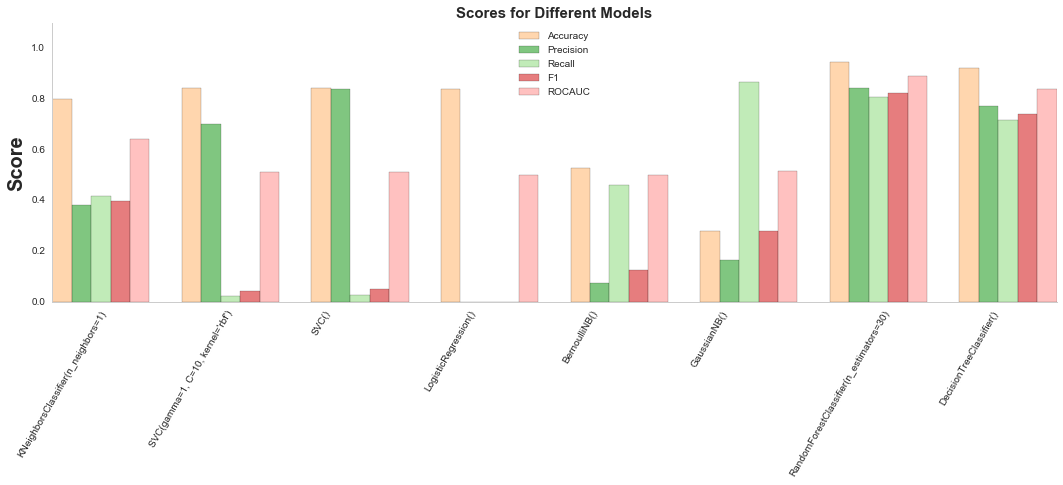

In [38]:
modeling = getCrossValScoresBySSS(X,y)
modeling.get_multi_models(year=2013, make_single_plot=True)

[[170   4]
 [  4  29]]
Avg Feature Importance: [ 0.11320473  0.13149219  0.14093573  0.12304138  0.13361651  0.14842185
  0.20928761]
Accuracy: 0.9465700483091787
Precision: 0.8489187222371563
Recall: 0.8090909090909092
f1: 0.8279461764510907
ROC AUC: 0.8908672936259145


(0.94657004830917868,
 0.84891872223715625,
 0.80909090909090919,
 0.8279461764510907,
 0.89086729362591455)

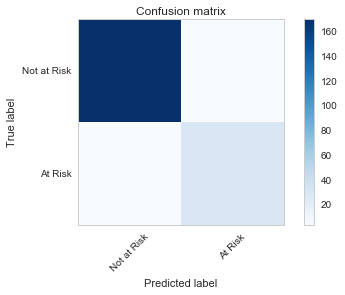

In [43]:
modeling.get_single_model(model=RandomForestClassifier(n_estimators=30)	, 
                              year=2013, 
                              get_cm=True, 
                              output_prediction=False,
                              )

forest_acc = []
forest_prec = []
forest_rec = []
forest_f1 = []
forest_range = list(range(1,100,10))
for trees in forest_range:
    acc, prec, rec, f1, _ = modeling.get_single_model(model=RandomForestClassifier(n_estimators=trees),\
                                                      verbose=False,\
                                                      return_features=False)
    forest_acc.append(acc)
    forest_prec.append(prec)
    forest_rec.append(rec)
    forest_f1.append(f1)

plt.figure(figsize=(11,7))
plt.plot(forest_range, forest_acc, label='Accuracy')
plt.plot(forest_range, forest_prec,label='Precision')
plt.plot(forest_range, forest_rec,label='Recall')
plt.plot(forest_range, forest_f1,label='F1')

plt.legend(loc='best')
plt.xlabel('Num Trees')
plt.ylabel('Score')
plt.title('Scores at various tree sizes')
plt.show()

In [36]:
modeling.get_multi_models(year=2010, year_delta=2)

/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/kenn/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,Accuracy,Precision,Recall,F1,ROCAUC
KNeighborsClassifier(n_neighbors=1),0.834951,0.515693,0.506857,0.509911,0.704481
"SVC(gamma=1, C=10, kernel='rbf')",0.830097,0.000000,0.000000,0.000000,0.500000
SVC(),0.830097,0.000000,0.000000,0.000000,0.500000
LogisticRegression(),0.828641,0.018095,0.006857,0.009233,0.501850
BernoulliNB(),0.513204,0.081553,0.480000,0.139419,0.500000
GaussianNB(),0.294563,0.180642,0.888571,0.300158,0.530777
RandomForestClassifier(n_estimators=30),0.961942,0.903901,0.870286,0.885973,0.925494
DecisionTreeClassifier(),0.929417,0.812619,0.764571,0.785800,0.863865


In [37]:
modeling.future_crisis_countries(year=2010, year_delta=2)

Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
Index: []
Empty DataFrame
Columns: [year_prior, prediction, prediction_actual, net]
In